In [2]:
import findspark
findspark.init()

In [3]:
import pyspark
from pyspark.sql import SparkSession
spark=SparkSession.builder.master("local").appName('final').getOrCreate()
sc=spark.sparkContext

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from pandas.core.frame import DataFrame
import seaborn as sns

In [6]:
import os 
os.chdir('C:\\Users\\wuzix\\Desktop\\final big\\archive')

In [7]:
df = spark.read.option('header','true').csv('C:\\Users\\wuzix\\Desktop\\final big\\archive\\movies_metadata.csv',inferSchema=True)
df.show()

+-----+---------------------+------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------+--------------------+--------------------+--------+-------+--------------------+--------------------+------------+--------------------+-----+-----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|adult|belongs_to_collection|budget|              genres|            homepage|                  id|             imdb_id|   original_language|                       original_title|            overview|          popularity|         poster_path|production_companies|production_countries|        release_date|  revenue|             runtime|    spoken_languages|  status|tagline|               title|               video|vote_average|          vot

In [8]:
df.printSchema()

root
 |-- adult: string (nullable = true)
 |-- belongs_to_collection: string (nullable = true)
 |-- budget: string (nullable = true)
 |-- genres: string (nullable = true)
 |-- homepage: string (nullable = true)
 |-- id: string (nullable = true)
 |-- imdb_id: string (nullable = true)
 |-- original_language: string (nullable = true)
 |-- original_title: string (nullable = true)
 |-- overview: string (nullable = true)
 |-- popularity: string (nullable = true)
 |-- poster_path: string (nullable = true)
 |-- production_companies: string (nullable = true)
 |-- production_countries: string (nullable = true)
 |-- release_date: string (nullable = true)
 |-- revenue: string (nullable = true)
 |-- runtime: string (nullable = true)
 |-- spoken_languages: string (nullable = true)
 |-- status: string (nullable = true)
 |-- tagline: string (nullable = true)
 |-- title: string (nullable = true)
 |-- video: string (nullable = true)
 |-- vote_average: string (nullable = true)
 |-- vote_count: string (nu

In [ ]:
rating = spark.read.option('header','true').csv('ratings.csv',inferSchema=True)

In [ ]:
rating2 = rating.groupby('movieId').agg(F.mean('rating')).select(['movieId','avg(rating)'])
df1 =rating2.join(df, df.id==rating2.movieId, how='inner')

In [9]:
df1 = df1.filter((df.revenue > 1000000)&(df.budget > 100000)&(df.runtime > 0) ).select(['genres','id','imdb_id','original_language','popularity', 'release_date', 'revenue', 'budget', 'runtime','status', 'title','vote_average' , 'vote_count'])

In [10]:
import pandas as pd

In [11]:
from pyspark.sql import functions as F
df2=df1.withColumn('ROI', (F.col('revenue')-F.col('budget'))/F.col('budget'))
df2.show()

+--------------------+------+---------+-----------------+----------+------------+----------+---------+-------+--------+--------------------+------------+----------+------------------+
|              genres|    id|  imdb_id|original_language|popularity|release_date|   revenue|   budget|runtime|  status|               title|vote_average|vote_count|               ROI|
+--------------------+------+---------+-----------------+----------+------------+----------+---------+-------+--------+--------------------+------------+----------+------------------+
|[{'id': 28, 'name...|140607|tt2488496|               en| 31.626013|  2015/12/15|2068223624|245000000|    136|Released|Star Wars: The Fo...|         7.5|      7993|  7.44172907755102|
|[{'id': 18, 'name...|   597|tt0120338|               en|  26.88907|  1997/11/18|1845034188|200000000|    194|Released|             Titanic|         7.5|      7770|        8.22517094|
|[{'id': 878, 'nam...| 24428|tt0848228|               en| 89.887648|   2012/4/25

In [12]:
dfnew = df2.toPandas()

TypeError: __call__() takes from 1 to 2 positional arguments but 3 were given

In [14]:
dfnew.dtypes

genres                object
id                    object
imdb_id               object
original_language     object
popularity            object
release_date          object
revenue               object
budget                object
runtime               object
status                object
title                 object
vote_average          object
vote_count            object
ROI                  float64
dtype: object

In [22]:
dfnew['popularity'].astype('float')
dfnew['runtime'].astype('float')
dfnew['revenue'].astype('float')
dfnew['budget'].astype('float')

0       245000000.0
1       200000000.0
2       220000000.0
3       150000000.0
4       190000000.0
           ...     
4354     20000000.0
4355      3800000.0
4356       521873.0
4357       355000.0
4358       800000.0
Name: budget, Length: 4359, dtype: float64

In [25]:
dfnew.iloc[0,0]

"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 878, 'name': 'Science Fiction'}, {'id': 14, 'name': 'Fantasy'}]"

In [ ]:
def func(row):
    list1 = row['genres']
    for i in list1:
        row['new_genre'] = i['name']
df202 = 

genre --- finance

In [9]:
genre = ['Horror', 'Mystery', 'Action', 'Adventure', 'Fantasy', 'Comedy', 'Thriller', 'Documentary', 'animation', 'romance', 'family', 'western','music' , 'crime', 'history', 'war']
genre = [s.capitalize() for s in genre]
for name in genre:
    locals()[name] = df2.filter(F.col("genres").contains(name))

In [10]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

data = []
for name in genre:
    data.append((name,locals()[name].agg(F.mean('revenue')).collect()[0][0],locals()[name].agg(F.mean('budget')).collect()[0][0],locals()[name].agg(F.mean('ROI')).collect()[0][0]))

In [11]:
genre_fin_df = sqlContext.createDataFrame(data, ('genre', 'avg_revenue', 'avg_budget', 'avg_ROI'))

In [12]:
genre_fin_df.show()

+-----------+--------------------+--------------------+------------------+
|      genre|         avg_revenue|          avg_budget|           avg_ROI|
+-----------+--------------------+--------------------+------------------+
|     Horror| 5.931128191737288E7| 1.885617635381356E7| 7.019573537107854|
|    Mystery|  8.02634475613577E7| 3.166516551697128E7|2.5074275279042104|
|     Action|1.4610516896502915E8|5.2548479307243966E7|3.2628705387567867|
|  Adventure|2.1142109539714625E8| 6.608013532818074E7|3.7026782959292244|
|    Fantasy| 2.117051259562212E8| 6.639765939400922E7|3.2733231739448327|
|     Comedy| 9.351493274833111E7|3.1095422833110813E7|3.4439125738068523|
|   Thriller|   9.0877849568612E7| 3.480981624763407E7| 3.688042478693695|
|Documentary|2.0039206833333332E7|           5906478.1| 8.329342816801804|
|  Animation|     2.45630534412E8|      6.7754078168E7| 5.737243443999973|
|    Romance| 7.648689706009616E7|2.4062421548076924E7|3.8809782975233555|
|     Family|2.1074723859

In [13]:
genre_fin_df.orderBy(genre_fin_df.avg_ROI.desc()).show(3)

+-----------+--------------------+--------------------+-----------------+
|      genre|         avg_revenue|          avg_budget|          avg_ROI|
+-----------+--------------------+--------------------+-----------------+
|Documentary|2.0039206833333332E7|           5906478.1|8.329342816801804|
|     Horror| 5.931128191737288E7| 1.885617635381356E7|7.019573537107854|
|      Music| 7.661524678205128E7|2.1525869134615384E7| 5.81531623509374|
+-----------+--------------------+--------------------+-----------------+
only showing top 3 rows



In [14]:
genre_fin_df.orderBy(genre_fin_df.avg_revenue.desc()).show(3)

+---------+--------------------+-------------------+------------------+
|    genre|         avg_revenue|         avg_budget|           avg_ROI|
+---------+--------------------+-------------------+------------------+
|Animation|     2.45630534412E8|     6.7754078168E7| 5.737243443999973|
|  Fantasy| 2.117051259562212E8|6.639765939400922E7|3.2733231739448327|
|Adventure|2.1142109539714625E8|6.608013532818074E7|3.7026782959292244|
+---------+--------------------+-------------------+------------------+
only showing top 3 rows



In [15]:
genre_fin_df.orderBy(genre_fin_df.avg_budget.desc()).show(3)

+---------+--------------------+-------------------+------------------+
|    genre|         avg_revenue|         avg_budget|           avg_ROI|
+---------+--------------------+-------------------+------------------+
|Animation|     2.45630534412E8|     6.7754078168E7| 5.737243443999973|
|  Fantasy| 2.117051259562212E8|6.639765939400922E7|3.2733231739448327|
|Adventure|2.1142109539714625E8|6.608013532818074E7|3.7026782959292244|
+---------+--------------------+-------------------+------------------+
only showing top 3 rows



In [16]:
rev_data = sorted(dict(zip([genre_fin_df.collect()[i][0] for i in range(16)],[genre_fin_df.collect()[i][1] for i in range(16)])).items(), key = lambda x:x[1],reverse = True)
bud_data = sorted(dict(zip([genre_fin_df.collect()[i][0] for i in range(16)],[genre_fin_df.collect()[i][2] for i in range(16)])).items(), key = lambda x:x[1],reverse = True)
ROI_data = sorted(dict(zip([genre_fin_df.collect()[i][0] for i in range(16)],[genre_fin_df.collect()[i][3] for i in range(16)])).items(), key = lambda x:x[1],reverse = True)

rev_data

[('Animation', 245630534.412),
 ('Fantasy', 211705125.9562212),
 ('Adventure', 211421095.39714625),
 ('Family', 210747238.59871244),
 ('Action', 146105168.96502915),
 ('Comedy', 93514932.74833111),
 ('Thriller', 90877849.568612),
 ('War', 82862289.03067484),
 ('Mystery', 80263447.5613577),
 ('Music', 76615246.78205128),
 ('Romance', 76486897.06009616),
 ('Crime', 75417954.0834512),
 ('History', 68929988.82828283),
 ('Horror', 59311281.91737288),
 ('Western', 57662440.51282051),
 ('Documentary', 20039206.833333332)]

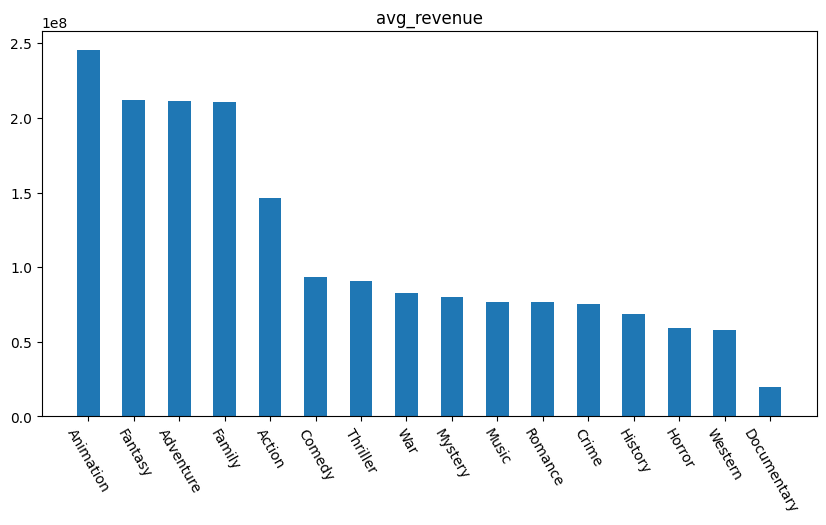

In [17]:
plt.figure(figsize=(10,5))
plt.bar(range(len(rev_data)),[i[1] for i in rev_data], tick_label=[i[0] for i in rev_data], width= 0.5)
plt.title('avg_revenue')
plt.xticks(rotation=300)
plt.show()

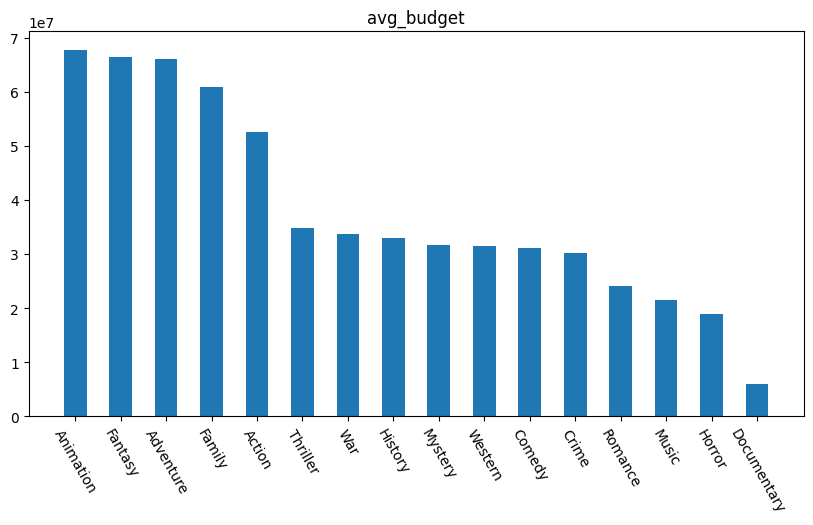

In [18]:
plt.figure(figsize=(10,5))
plt.bar(range(len(bud_data)),[i[1] for i in bud_data], tick_label=[i[0] for i in bud_data], width= 0.5)
plt.title('avg_budget')
plt.xticks(rotation=300)
plt.show()

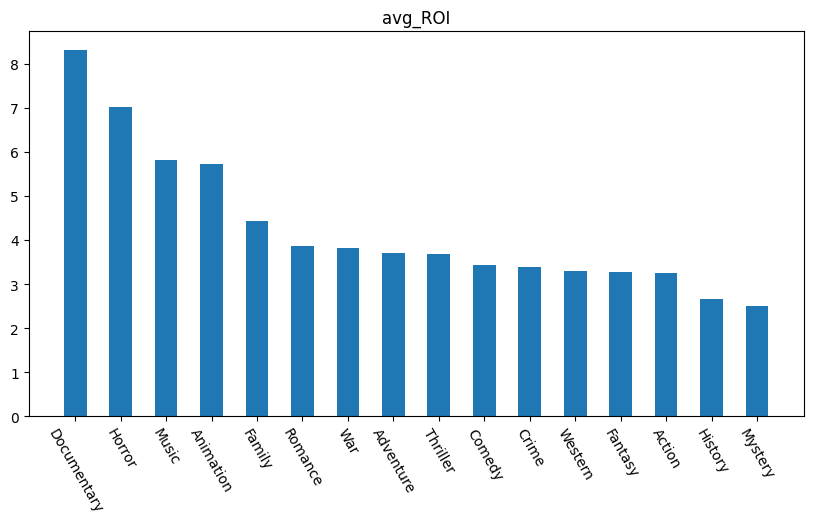

In [19]:
plt.figure(figsize=(10,5))
plt.bar(range(len(ROI_data)),[i[1] for i in ROI_data], tick_label=[i[0] for i in ROI_data], width= 0.5)
plt.title('avg_ROI')
plt.xticks(rotation=300)
plt.show()

popularity --- finance

In [20]:
df2.count()
#len(df2.columns)

4359

In [21]:
df_new = df2.withColumn("popularity",df2.popularity.cast('double'))
df_new = df_new.withColumn("runtime",df_new.runtime.cast('double'))
df_new = df_new.withColumn("vote_average",df_new.vote_average.cast('double'))
df_new = df_new.withColumn("vote_count",df_new.vote_count.cast('double'))

In [22]:
df_new.show()

+--------------------+------+---------+-----------------+----------+------------+----------+---------+-------+--------+--------------------+------------+----------+------------------+
|              genres|    id|  imdb_id|original_language|popularity|release_date|   revenue|   budget|runtime|  status|               title|vote_average|vote_count|               ROI|
+--------------------+------+---------+-----------------+----------+------------+----------+---------+-------+--------+--------------------+------------+----------+------------------+
|[{'id': 28, 'name...|140607|tt2488496|               en| 31.626013|  2015/12/15|2068223624|245000000|  136.0|Released|Star Wars: The Fo...|         7.5|    7993.0|  7.44172907755102|
|[{'id': 18, 'name...|   597|tt0120338|               en|  26.88907|  1997/11/18|1845034188|200000000|  194.0|Released|             Titanic|         7.5|    7770.0|        8.22517094|
|[{'id': 878, 'nam...| 24428|tt0848228|               en| 89.887648|   2012/4/25

In [23]:
pop_data = [df_new.collect()[i][4] for i in range(4359)]
ROI_row_data = [df_new.collect()[i][13] for i in range(4359)]

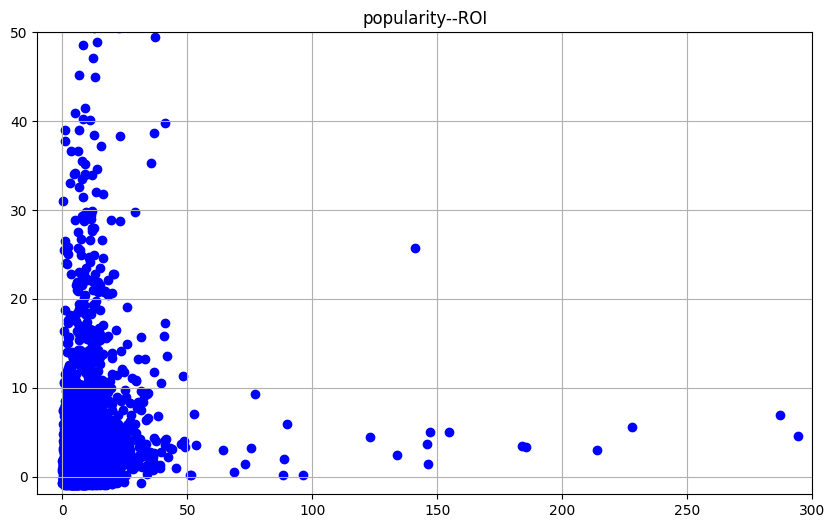

In [31]:
plt.figure(figsize = (10,6))
plt.scatter(pop_data, ROI_row_data ,color="blue")  
plt.xlim((-10, 300))
plt.ylim((-2, 50))
plt.title('popularity--ROI')
plt.grid()
plt.show() 

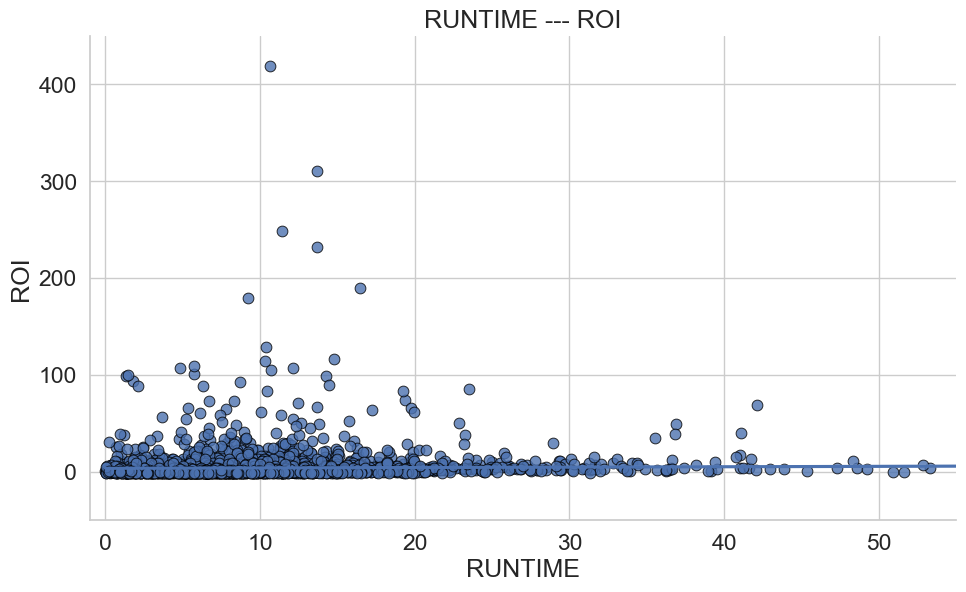

In [91]:
a={'ROI':ROI_row_data, 'RUNTIME':pop_data}
data1=DataFrame(a)
g1 = sns.lmplot(data = data1,x='RUNTIME',y='ROI',height=7,aspect=1.6,palette='Set1',scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
sns.set(style="whitegrid", font_scale=1.5)
g1.set(xlim=(-1, 55), ylim=(-50, 450))
g1.fig.set_size_inches(10, 6)
g1.tight_layout()
plt.title("RUNTIME --- ROI")
plt.show()

In [27]:
import scipy.stats as stats

r,p = stats.pearsonr(ROI_row_data,pop_data)  
print('corr = %6.3f，p_value = %6.3f'%(r,p))

corr =  0.034，p_value =  0.024


runtine --- finance

In [28]:
runtime_data = [df_new.collect()[i][8] for i in range(4359)]

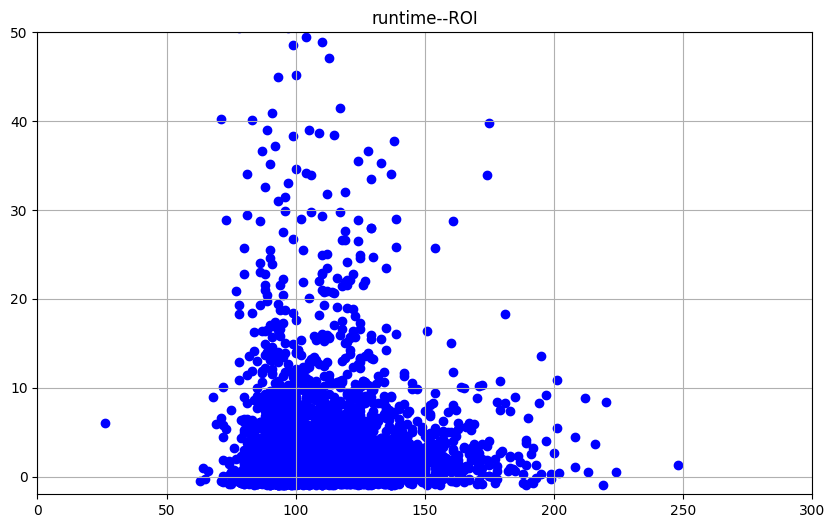

In [30]:
plt.figure(figsize = (10,6))
plt.scatter(runtime_data, ROI_row_data,color="blue") 
plt.xlim((0, 300))
plt.ylim((-2, 50))
plt.title('runtime--ROI')
plt.grid() 
plt.show() 

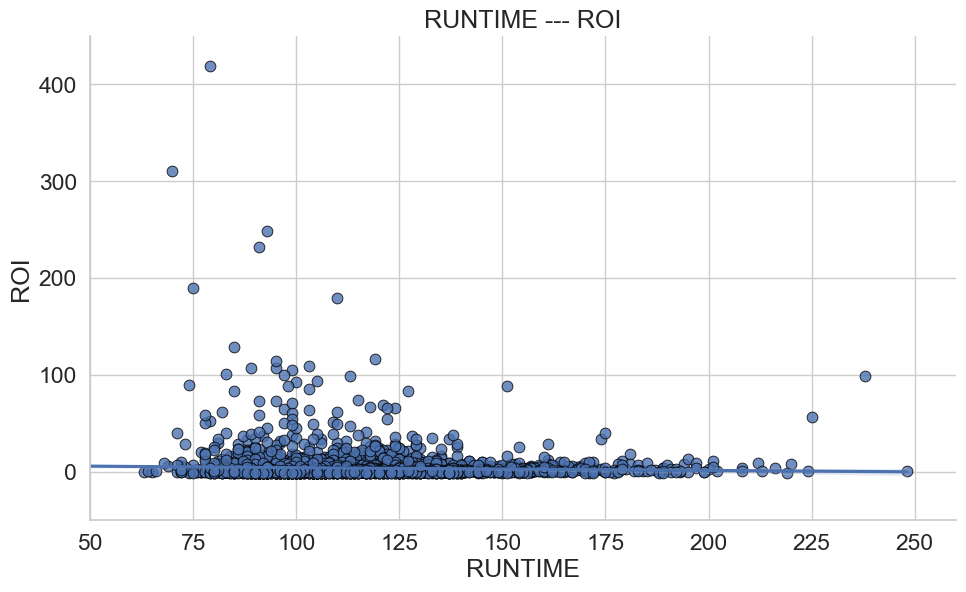

In [92]:
b={'ROI':ROI_row_data, 'RUNTIME':runtime_data}
data2=DataFrame(b)
g2 = sns.lmplot(data = data2,x='RUNTIME',y='ROI',height=7,aspect=1.6,palette='Set1',scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
sns.set(style="whitegrid", font_scale=1.5)
g2.set(xlim=(50, 260), ylim=(-50, 450))
g2.fig.set_size_inches(10, 6)
g2.tight_layout()
plt.title("RUNTIME --- ROI")
plt.show()

In [34]:
import scipy.stats as stats

r,ru = stats.pearsonr(ROI_row_data,runtime_data)  
print('corr = %6.3f，p_value = %6.3f'%(r,ru))

corr = -0.036，p_value =  0.016


rate --- finance

In [36]:
df_vote = df_new.filter(df_new.vote_count > 100)
df_vote.count()

3321

In [37]:
rate_data = [df_vote.collect()[i][11] for i in range(3321)]

In [39]:
ROI_row_data1 = [df_vote.collect()[i][13] for i in range(3321)]

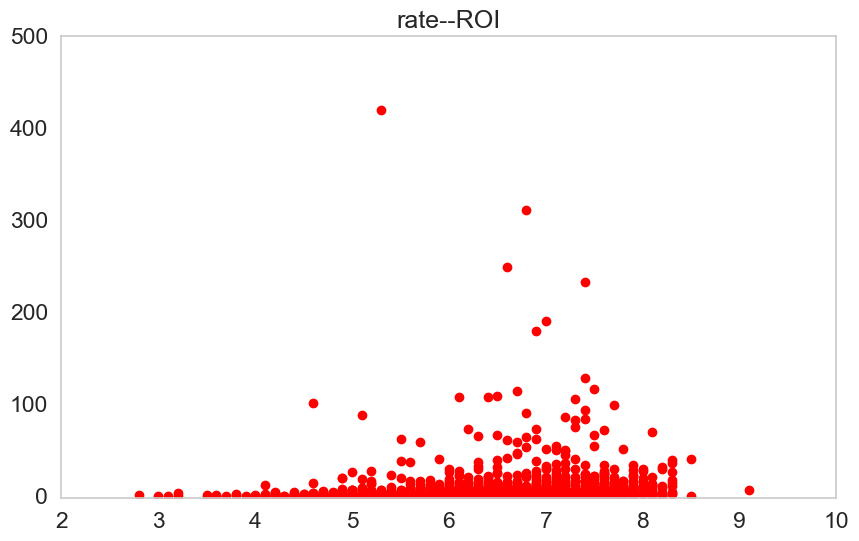

In [81]:
plt.figure(figsize = (10,6))
plt.scatter(rate_data, ROI_row_data1,color="Red") 
plt.xlim((2, 10))
plt.ylim((-2, 500))
plt.title('rate--ROI')
plt.grid() 
plt.show() 

In [43]:
import scipy.stats as stats

r1,ra = stats.pearsonr(ROI_row_data1,rate_data)  
print('corr = %6.3f，p_value = %6.3f'%(r1,ra))

corr =  0.107，p_value =  0.000


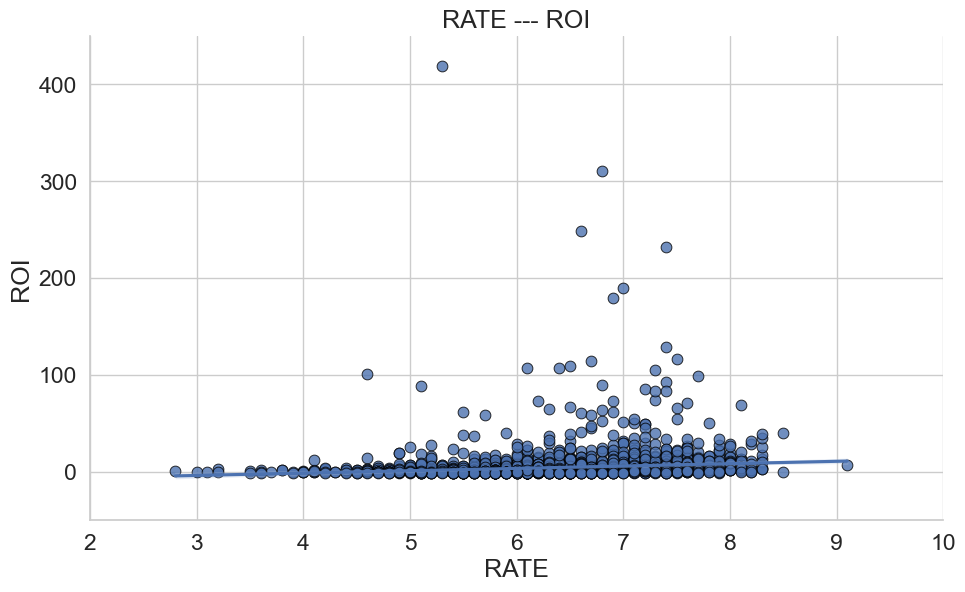

In [93]:
c={'ROI':ROI_row_data1, 'RATE':rate_data}
data3=DataFrame(c)
g3 = sns.lmplot(data = data3,x='RATE',y='ROI',height=7,aspect=1.6,palette='Set1',scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
sns.set(style="whitegrid", font_scale=1.5)
g3.set(xlim=(2, 10), ylim=(-50, 450))
g3.fig.set_size_inches(10, 6)
g3.tight_layout()
plt.title("RATE --- ROI")
plt.show()